## Plot loss and accuracy curves

- This plots the loss and accuracy curves for training and validation sets using the log files

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Enter path to log files
with open('out.txt', 'r') as f:
    data = f.readlines()

In [3]:
[line for line in data if line.startswith('--')]

['------------ Options -------------\n',
 '-------------- End ----------------\n']

In [4]:
def get_ix_startswith(string):
    """
        Return ix of line starting with string
    """
    for ix, line in enumerate(data):
        if line.startswith(string):
            print(line)
            return ix
    print('Not found')

In [5]:
ix_1 = get_ix_startswith('------------ Options')
ix_2 = get_ix_startswith('-------------- End')
data[ix_1+1:ix_2]

------------ Options -------------

-------------- End ----------------



['batch_size: 100\n',
 'beta1: 0.9\n',
 'beta2: 0.999\n',
 'channels: 1\n',
 'checkpoints_path: ./checkpoints\n',
 'cuda: True\n',
 'dataset_path: /home/lbuffoni/melanoma_disk/melanoma_new/new_melanoma_images\n',
 'debug: False\n',
 'ensemble: 1\n',
 'epochs: 50\n',
 'gpu_ids: 0\n',
 'log_interval: 50\n',
 'lr: 0.001\n',
 'network: 2\n',
 'no_cuda: False\n',
 'patch_stride: 256\n',
 'seed: 1\n',
 'test_batch_size: 64\n',
 'testset_path: /home/lbuffoni/melanoma_disk/melanoma_new/new_melanoma_images/test\n']

In [6]:
'Extract all line starting with Epoch'
epochs_data = [line for line in data if line.startswith('Epoch:')]
epochs_data[0:3]

['Epoch: 1/50 [1000/96000 (1%)]\tLoss: 1.781981, Accuracy: 18.00%\n',
 'Epoch: 1/50 [2000/96000 (2%)]\tLoss: 1.688666, Accuracy: 18.00%\n',
 'Epoch: 1/50 [3000/96000 (3%)]\tLoss: 1.554124, Accuracy: 21.00%\n']

In [7]:
import re

def parse_epoch_entry(entry):
    """
        Parse an epoch string and return useful numbers.
    """
    pattern_1 = 'Epoch: (\d+)/(\d+) \[(\d+)/(\d+) \((\d+)\%\)\]\tLoss: (\d+)\.(\d+)\,' 
    pattern_2 = ' Accuracy: (\d+)\.(\d+)\%\n'
    pattern = pattern_1 + pattern_2
    try:
        g = re.match(pattern, entry)
        cur_epoch = int(g.groups()[0])
        tot_epoch = int(g.groups()[1])
        cur_patch = int(g.groups()[2])
        tot_patch = int(g.groups()[3])
        pct_patch = int(g.groups()[4])
        loss = float(g.groups()[5] + '.' + g.groups()[6])
        accuracy = float(g.groups()[7] + '.' + g.groups()[8])
        return cur_epoch, tot_epoch, cur_patch, tot_patch, pct_patch, loss, accuracy
    except:
        print('something bad happened')

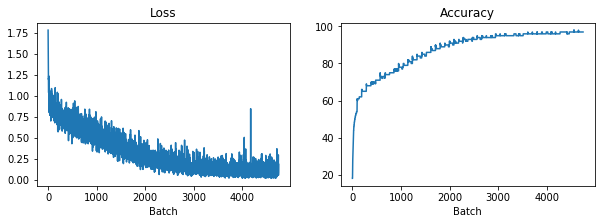

In [8]:
'Plot loss and accuracy as a function of batch'
losses = [parse_epoch_entry(entry)[5] for entry in epochs_data]
accs = [parse_epoch_entry(entry)[6] for entry in epochs_data]
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
axs[0].plot(losses);
axs[0].set_title('Loss')
axs[0].set_xlabel('Batch')
axs[1].plot(accs);
axs[1].set_xlabel('Batch')
axs[1].set_title('Accuracy');

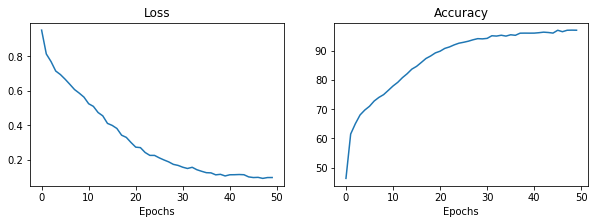

In [11]:
'Plot mean loss and mean accuracy vs epoch'
epochs = np.array([parse_epoch_entry(entry)[0] for entry in epochs_data])
losses = np.array([parse_epoch_entry(entry)[5] for entry in epochs_data])
accs = np.array([parse_epoch_entry(entry)[6] for entry in epochs_data])
mean_loss = []
mean_acc = []
for epoch_ix in range(1, 51):
    mask = np.array(epochs) == epoch_ix
    loss = losses[mask].mean()
    acc = accs[mask].mean()
    mean_loss.append(loss)
    mean_acc.append(acc)
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
axs[0].plot(mean_loss);
axs[0].set_title('Loss')
axs[0].set_xlabel('Epochs')
axs[1].plot(mean_acc);
axs[1].set_xlabel('Epochs')
axs[1].set_title('Accuracy');

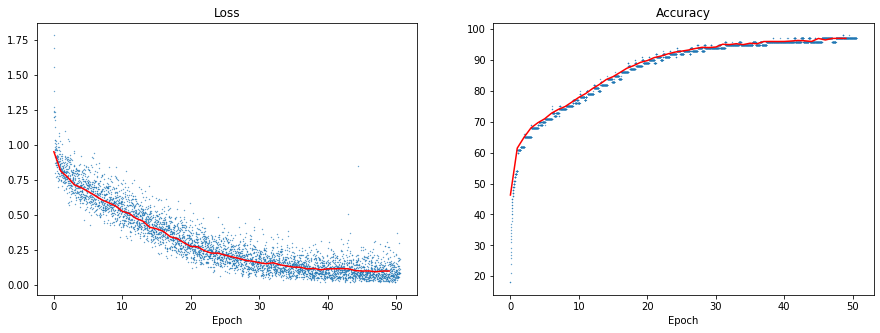

In [19]:
'Overlay mean plots with batch plot'
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
epoch_xs = np.array(range(len(losses))) / 94
axs[0].scatter(x=epoch_xs, y=losses, s=.1);
axs[0].plot(mean_loss, 'r');
axs[0].set_title('Loss')
axs[0].set_xlabel('Epoch')
axs[1].scatter(x=epoch_xs, y=accs, s=.1);
axs[1].plot(mean_acc, 'r');
axs[1].set_xlabel('Epoch')
axs[1].set_title('Accuracy');